# The California Racial Justice Act & San Diego PD RIPA Data


## Abstract 

Approved in 2020, the California Racial Justice Act allows defendants to appeal for a retrial of their case or an adjustment of the charges or sentencing leveled at them if they can prove that there was racial bias at play. The bill doesn’t actually specify the kind of statistical proof a judge would require, though, so this project is a preliminary search to start to find out what kinds of aspects of criminal justice data might be useful to those invoking the CRJA. To that end, this project used pandas to analyze a dataset of San Diego Police Department stop data collected under RIPA, the Racial and Identity Profiling Act of 2015. 

## Table of Contents

1. ### [Introduction](#introduction)
2. ### [Methods](#methods)
3. ### [Results](#results)
4. ### [Discussion](#discussion)
5. ### [Sources + Adjacent Data](#sources)

## Introduction <a id='introduction'></a>

The California Racial Justice Act (AB-2542), approved by the governor in September 2020, is legislation that intends to combat racial bias and disparities in the criminal justice system by offering defendants a chance to contest their cases. The CRJA is usable on multiple levels — checking racial bias both in and out of courtrooms — as it addresses within-court instances of bias as well as racially charged disparities in sentencing, charges, and convictions. If the defendant invoking the CRJA can provide proof of discrimination occurring, a new trial will be set up for the case or the charges or sentence may be adjusted, depending on how far along the court case is. 

It’s key legislation in that it not only takes into account intentional bias directed at the defendant (by any other key figure in the courtroom processes) but also racially coded language or interactions. The aspect of the CRJA that this project specifically has focused on is racial disparities in charges. The evidence needed for proof of discrimination in court (when it comes to racial bias in charges) is differences due to race, national origin, or ethnicity in charges on a county-wide basis. 

The goal of this project was originally to synthesize a database of information (via extensive data collection, organization, and cleaning) that searches for evidence of racial discrimination, bias, or disparities in terms of individuals stopped by the police and what charges they faced as a result. It ended up focusing on a relatively narrow dataset, using pandas to explore and analyze specifically traffic stop data collected by the San Diego Police Department as part of the Racial and Identity Profiling Act of 2015. 


## Methods <a id='methods'></a>

The actual code used to break down & perform various tests — including outcome testing (in the form of several Veil of Darkness tests) and analysis of stacked charges  — on the RIPA stop data.

All data used can be found & downloaded [here](https://data.sandiego.gov/datasets/police-ripa-stops/) and on linked pages.

In [473]:
#import + consolidate San Diego RIPA data into one massive df (result_df)

In [474]:
import pandas as pd   
import missingno as msno
import matplotlib.pyplot as plt
#from astral import LocationInfo
#from astral.geocoder import database, lookup
import seaborn as sns
import datetime
from datetime import date
#from astral.sun import sun
#city = lookup("San Diego", database())

def convert_dtype_float(x):
    if not x:
        return 0
    try:
        return float(x)   
    except:        
        return 0
    
def convert_dtype_string(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''
    
convert_dict = {'date_stop': str}
    
contraband_evid_df = pd.read_csv("../data/ripa_contraband_evid_datasd.csv")                                
disability_df = pd.read_csv("../data/ripa_disability_datasd.csv")
gender_df = pd.read_csv("../data/ripa_gender_datasd.csv", converters = {"gender": convert_dtype_string})
prop_seize_basis_df = pd.read_csv("../data/ripa_prop_seize_basis_datasd.csv", converters = {"basisforpropertyseizure": convert_dtype_string})
prop_seize_type_df = pd.read_csv("../data/ripa_prop_seize_type_datasd.csv", converters = {"type_of_property_seized": convert_dtype_string})
race_df = pd.read_csv("../data/ripa_race_datasd.csv")
stop_result_df = pd.read_csv("../data/ripa_stop_result_datasd.csv")
stop_reason_df = pd.read_csv("../data/ripa_stop_reason_datasd.csv", converters = {"reason_for_stopcode": convert_dtype_float})
stop_details_df = pd.read_csv("../data/ripa_stops_datasd.csv", converters = {"land_mark": convert_dtype_string}) 
stop_details_df = stop_details_df.astype(convert_dict)
result_df = pd.merge(contraband_evid_df, disability_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, gender_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])
result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'])


<ipython-input-474-b9f887d59caa>:38: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_details_df = pd.read_csv("../data/ripa_stops_datasd.csv", converters = {"land_mark": convert_dtype_string})


### PART 1: PRELIMINARY DATA BREAKDOWNS & ANALYSIS

In [475]:
#missingno package allows for visualization of missing data within result_df

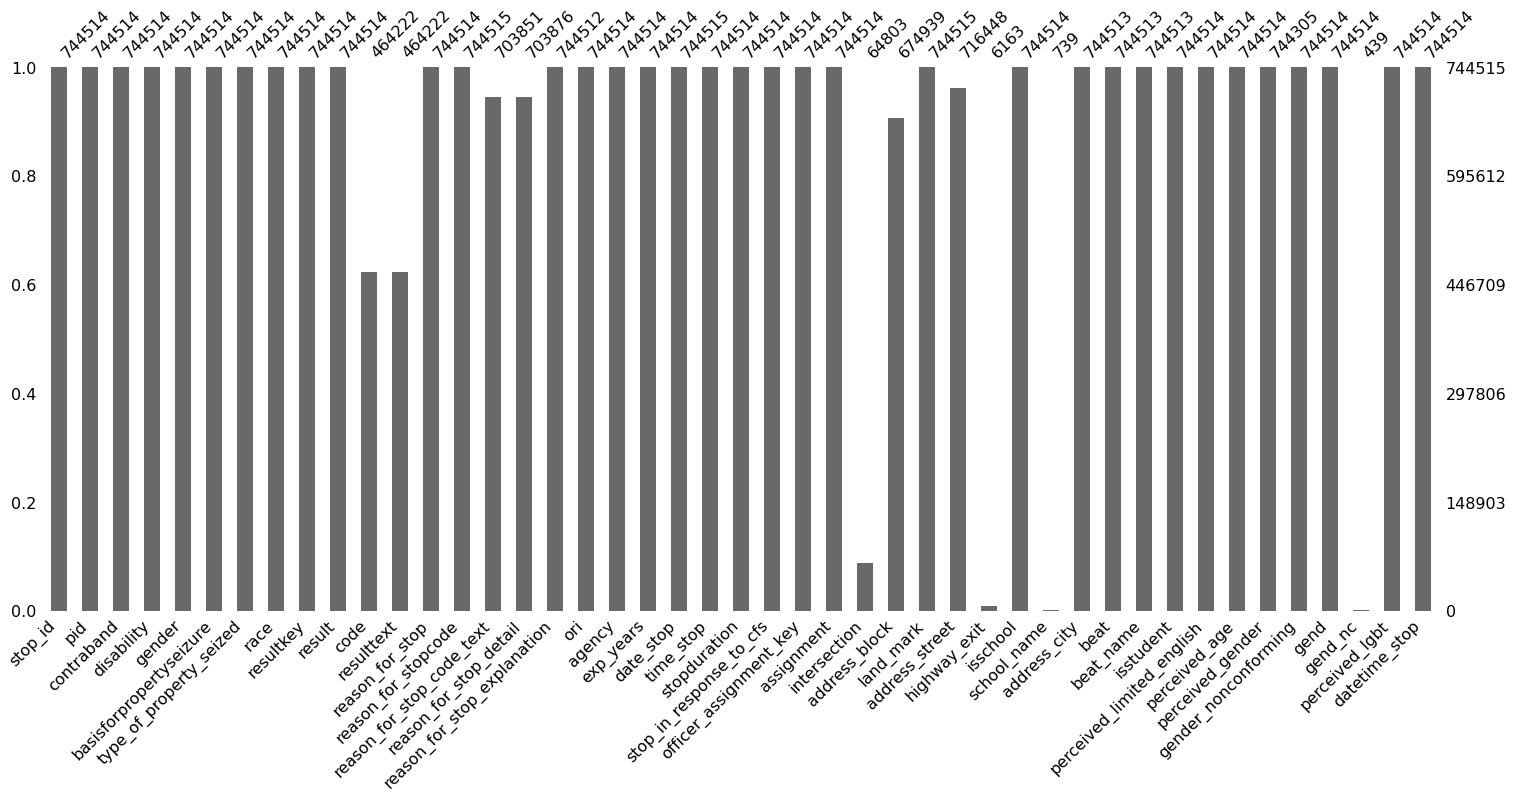

In [476]:
msno.bar(result_df);

In [478]:
# date range of the RIPA data
pd.to_datetime(result_df['date_stop']).min(), pd.to_datetime(result_df['date_stop']).max()

(Timestamp('2018-07-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [38]:
outs = result_df.groupby('resulttext')['stop_id'].count().sort_values(ascending=False).iloc[:50]
#outs.index = outs.index.astype(int)
outs.name = 'how many'
outs.to_frame()

,how many
resulttext,
65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,41646
22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,18963
22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,16300
11364(A) HS - POSS UNLAW PARAPHERNALIA (M) 35423,15692
21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,12248
11377(A) HS - POSSESS CNTL SUB (M) 35353,12051
22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,11138
23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,10896
25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,9975


In [380]:
outs = result_df.groupby('resulttext')['stop_id'].count().sort_values(ascending=False).iloc[50:100]
#outs.index = outs.index.astype(int)
outs.name = 'how many'
outs.to_frame()

,how many
resulttext,
27150(A) VC - INADEQUATE MUFFLERS (I) 54116,1825
22349 VC - EXCESSIVE SPEED (M) 54134,1710
30305(A)(1) PC - PROHIB OWN/ETC AMMO/ETC (F) 52504,1665
273.5(A) PC - CRPL INJ:SPOUS/COHAB/DATE (F) 38080,1664
485 PC - APPROPR LOST PROP (M) 23106,1646
NA - XX ZZ - CODE NOT FOUND IN TABLE (X) 99999,1627
496D(A) PC - POSS STOLEN VEH/VES/ETC (F) 28035,1510
21310 PC - CARRY CON/DIRK OR DAGGER (F) 52564,1479
10851(A) VC - VEHICLE THEFT (F) 24054,1456


In [382]:
result_df.query('code == 99990')['reason_for_stop_explanation']

5960            Radio call of person threatening suicide.  
11565                 Subject was contacted on a radio call
20332                             ENCROACHMENT 54.0110 SDMC
29987                                                  5150
34466     veh parked at red zone. ro is diabetic and had...
                                ...                        
744032    Male found sleeping in truck with flat tires t...
744227    Radio call 415 subject acting 5150 punching cars.
744228    Radio call 415 subject acting 5150 punching cars.
744496                                    walking in street
744507                                              5150 WI
Name: reason_for_stop_explanation, Length: 1248, dtype: object

In [386]:
keywords =  'habitation|habitating|inhabit|habitaion|647e|647\(e\)|647 e|647 \(e\)|lodging|lodged|54.0110|encroach|incroach|encroch|incroch'

these = result_df['reason_for_stop_explanation'].str.lower().str.contains(keywords).fillna(False)

print('Specifically labelled habitation, lodging, encroachment across everything:\n',
      '{} stops covering {} persons'.format( 
          result_df.loc[these,'stop_id'].unique().shape[0], 
          result_df.loc[these,['stop_id','pid']].drop_duplicates().shape[0] ) 
     )


Specifically labelled habitation, lodging, encroachment across everything:
 18773 stops covering 27126 persons


In [392]:
[ print(x) for x in result_df.loc[these,'reason_for_stop_explanation'].unique()];

Subject was encroching on sidewalk/4th waiver
54.0110 sdmc
SUBJ WAS ENCROACHING/LODGING WITH LARGE AMOUNT OF BELONGINGS AT PARK
SUBJECT STOPPED FOR ENCROACHMENT
STOPPED FOR ENCROACHMENT
observed subject illegally lodging on a public beach in a fully construsted sleeping tent 
subject contacted for sdmc 54.0110 for sitting on the side with property next to him scattered on the ground.
saw subj in violation of 54.0110 sdmc at location. detained subj. no wants or warrants. field interview was conducted and subj was released at scene. homeless outreach team information was provided to subj.
encroachment
Encroachment
Male was encroaching on sidewalk
ILLEGAL LODGING
ped stop for 485pc investigating illegal lodging
Ped stop for 485pc and ilegal lodging 
Ped stop for 485pc and illegal lodging 
subject of compalint for illegal lodging
MALE WAS ENCROACHING AND REFUSED TO LEAVE PER SECURITY 
FLAG DOWN REGARDING MALE INHABITING VEHICLE ON STREET
SUBJ WAS ENCROACHING IN RIVERBED
subject sleeping on

habitating inside vehicle
Subect was illegally lodging
encroachment and trespassing
SUBJECT WAS PARKED ON STREET. POSSIBLY HABITATING IN VEHICLE
Subj found encroaching on public way.
SUBJECT WAS SITTING IN A CHAIR ALONG THE ROADWAY ALONG POSSIBLY LODGING
Subj encroaching on public sidewalk
Subject detained for illegal lodging and encroachment. Subject was issued a citation
Subject detained for illegal lodging and encroachment.  Subject was issued a citation
illegall lodging 
veh habitation
ILLEGAL LODGING ENCROACHMENT
subj started walking away from group that was encroaching
CONTACTED A FEMALE LAYING ON A TARP WITH PERSONAL PROPERTY AROUND. GIVEN WARNING FOR ENCROACHMENT. 
ENCROACHMENT OF A PUBLIC WAY SDMC
subject was inside a tent at a city park lodging.
lodging in vehicle
Subject stopped in relation to 54.0110 SDMC
encroaching. radio call of 11550 or 647f possible
VEHICLE INHABITATION
SUBJECT WAS LAYING ON GRASS WITH POSTED SIGNS NO HABITATION
Illeagal lodging
The subject appeared to

Subject detained for illegal lodging,.  Subject was issued a citation for violation.
subj near items on city property in violation of encroachment.  subj had warrant
male illgally lodging
subject encroaching 54.0110
54.0110 Subject sleeping on sidewalk
encroaching public sidewalk
VEHICLE HABITATION, TOWED VEH FOR EXP REG
male illegally lodging at location
MALE ENCROACHING SIDEWALK WITH BELONGINGS
ILLEGEAL LODGING
Male was encroaching along the location listed.  Verbal warning.
Female was encroaching on sidewalk.  Verbally warned.
Male was encroaching along sidewalk.  Verbally warned.
Male had belongings close to sidewalk and had a shopping cart.  Verbal warning for encroachment/602.
647e activity
encroaching public way with belongings .
illegal lodging under hawthorn bridge
ILLEGAL LODGING IN OPEN SPACE CANYON
expired registration / vehicle habitation
Contacted for 54.0110 SDMC and found to have felony no bail warrant
encroach / 485 pc
subj was encroachment/ illegal lodging
illegal lod

Subject encroaching on private property.
Subject encroaching in front of business.
vehicle habitation/ several warnings already given
Subject illegally lodging
Male was sitting with hsi property partially blocking doorway in violation of 54.0110 SDMC
subject lodging
ped stop for encroachment. fi.
SUBJ WAS ILLEGALLY LODGING ALONG SIDEWALK
subject was in violation of 54.0110 sdmc
11-51 subject sleeping under a "No Tresspassing" sign. Subj encroaching on property.
SUBJECT WAS ILLEGALLY LODGING ALONG RIVERBED
illegal lodging on mattress on bridge
Illegally lodging in makeshift structure with a mattress
sUBJECT IN VIOLATION OF ENCROACHMENT
54.0110 sdmc - encroachment NPD
no search, illegal lodging. chronic complaint from staff at location
Illegally lodging and had possession of a narcotic pipe
encroachment/open container
SUBJECT WAS ILLEGALLY LODGING ALONG STREET.
subj blocking public passageway and setting up encampment. educated on illeg lodging and encroachmnt    refused shelter bed
ille

In [379]:
result_df.loc[ result_df['resulttext'].str.lower().str.contains('crch').fillna(False), 'resulttext'].unique()

array(['1460(B) SH - CHG ENCRCHMNT W/O PERMIT (M) 66134'], dtype=object)

In [97]:
 result_df.loc[ result_df['resulttext'].str.contains('LOCAL').fillna(False),['code','resulttext'] ].drop_duplicates()

,code,resulttext
16,65002.0,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002
445,65000.0,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000


In [100]:
result_df.query('code == 32111')[['reason_for_stop_detail','reason_for_stop_explanation']]

,reason_for_stop_detail,reason_for_stop_explanation
135,Other Reasonable Suspicion of a crime,Call for service to this location for someone ...
197,Officer witnessed commission of a crime,MALE SITTING ON CURB WITH MULTIPLE BAGS OF ITEMS
198,Other Reasonable Suspicion of a crime,MALE SLEEPING IN PUBLIC PARKING LOT..MULTIPLE ...
223,Officer witnessed commission of a crime,sleepin in car
599,Other Reasonable Suspicion of a crime,REPORTING PARTY CALLED ABOUT A TRANSIENT HARAS...
...,...,...
742230,Officer witnessed commission of a crime,two males sleeping in makeshift structure on s...
742434,Officer witnessed commission of a crime,subj inside tent with belongings
743678,Officer witnessed commission of a crime,illegal lodging
744003,Officer witnessed commission of a crime,illegal lodging


In [106]:
result_df.query('code == 32022')[['reason_for_stop_explanation']].iloc[:50]

,reason_for_stop_explanation
178,Radio call of transient in car port
394,A RADIO CALL OF DISTURBANCE
395,A RADIO CALL OF A DISTURBANCE
397,A RADIO CALL OF A DISTURBANCE WITH ALCOHOL
567,WALKING AWAY
721,PED TRESSPASS FI
722,PED TRESPASS FI
789,Subject was sleeping in hallway
848,RADIO CALL
849,RADIO CALL


In [107]:
result_df.query('code == 32111')[['reason_for_stop_explanation']].iloc[:50]

,reason_for_stop_explanation
135,Call for service to this location for someone ...
197,MALE SITTING ON CURB WITH MULTIPLE BAGS OF ITEMS
198,MALE SLEEPING IN PUBLIC PARKING LOT..MULTIPLE ...
223,sleepin in car
599,REPORTING PARTY CALLED ABOUT A TRANSIENT HARAS...
785,"Sleeping on south sidewalk with tarp, cardboar..."
790,SUBJ WAS ENCROACHING/LODGING WITH LARGE AMOUNT...
792,ILLEGAL TENT SET UP IN CITY PARK
797,sleeping on beach
820,SLEEPING IN ILLEGAL CAMP ON CITY PROPERTY


In [136]:
#OMFG! look at how the early stuff, obvious homelessness is 1 / 100.  in the later stuff homeless related is 85/100!@#!
[print(x) for x in result_df.query('code == 65002')['reason_for_stop_explanation'].str.lower().unique()]

failure to stop at red light
lidar @ 54 mph in a posted 35 mph zone
right front headlight out. stop revealed registration expired
the male was holding an open can of beer
suspended driver's license
loud exhaust
found paraphernalia in backpack. 4th waiver.
female sleeping on the beach 
ran red light
red arrow
ran a stop sign
using cell phone while driving
speeding over 15 mph above speed limit
speeding over 15 mph above posted speed limit
speeding 13 mph above posted spd limit
speeding 13 mph above the posted speed limit
speeding 13 mph above posted speed limit
cite for 23123.5(a) cvc
phone
hand held cell phone
hand held cell
helmet required
helmet
driving with expired tags, driving on suspended license
sleeper
ran a red light
speeding
mc helmet
saw brake light out drivers side
restricted lane
non-hands free cell phone use
holding cell phone in hand while driving
stopped in roadway
ran red light and riding bicycle wrong way on one way street
texting and driving
expired registration
tint

no signal
speeding sign vio
open alc
pass break light out
insur exp
was blocking the sidewalk
had a bottle of beer
did not have dog on leash
cracked windsheild
4000(a)(1) cvc
unsafe movement to the right
subject was illegally lodging in an area where citizens have launched formal complaints. a records check was conducted and the subject was made aware of hot team resources. fi was completed and subject was cited for 25620(a) bp, had an open container
drove through red light stop light
did not make a complete stop for stop sign
front side window tint, not using directional, expired registration
riding scooter w/out helmet 
fail to stop at stop sign
cellphone while driving
alcoh consum
glass on beach
no current 2018 sticker 
saving parking
ice cream sales
consumption of alcohol
in line for concert @ soma with 32oz bud light bottle - 1/2 full, cold
did not stop for red light
recognized open container
possessed meth and paraphernalia
seen holding open container
license
pedicab not stop at 

subject sleeping on private property with letter of authorization.
subject had lawn chairs and property remaning on city sidewalk. 
subject was sitting in curb with belongings on the city sidewalk. 
subject had multiple belongings and shopping cart on public sidewalk. 
sdmc violation
subject did not make a complete stop at sign
subject failed to stop for red light arrow
left tail light was out
no plate light
415 suspect 
subject had a tent set up on sidewalk
subj sleeping on sidewalk
saw subj with open container
going against light
subject did not have a validated fare
subject did not have validated trolley fare
ran stop sign 
two earbuds in ears
no proof of insurance at crash 
encroaching on sidewalk, private property with belongings.
encroachment of property on sidewalk, open container of alcohol.
5200(a) front plate
failed to yeild at red traffic signal
4 points
cross simlu island
encroachment with large cart of belongings, open container alcohol.
encroachment on sidewalk with belon

person had multiple items of property on sidewalk, had not been talked to in a number of years for the same violation, was given a warning, fi completed
person had multiple items of property on the sidewalk, had not been talked to about violation for several years, was given a warning, fi completed
had several items of property on the south sidewalk including a large structure set up, fi completed warning issued
was arrested for resisting or delaying officers, while investigating a shoplifting call
person had multiple items set up on the west sidewalk, has been told before in the past, given citation
person had multiple items set up on the west sidewalk, given warning, fi completed
flag down of a resident stating a vehicle was parked on the red zone 
person had multiple items on the west sidewalk, had been spoken to numberous times in the past and was given a citation
violation o fsign, stop sign, and parked on wrong side of road
passenger side brake like out
stopped vehicle for matchi

violatino fo signs
violartion fof signs
located a 2 vehicle 11-83 at location
exp regi
need to display current tabs
failure to yeild misd
driving without headlights during hours of darkness
leaving known narc location
subject driving car in bike lane
subj using phone
subj viol signs
speedd
row at grn arrow
uturn in ta business district 
subject was issued a citation for illegal lodging.
415 in park narc area
vehicle drove in to oncoming lane of traffic. no insurance.
uturn over dbl yellow
female on phone while driving
illegal turn on red arrow
contacted for sleeping in tent on sidewalk
set up tent on sidewalk
set upl structure on sidewalk
license plate not affixed and tinted windows
subject was stopped for obstructing a sidewalk 
went through a no turn on red.
digging in recycle bin
subject was stopped for illegally lodging 
driving with registration expired
subject urinating on garbage bin
subject urinating in garag in alley 
driving with driver license in possession
speeding while lo

male observed sleeping on the beach in violation of posted signs
male with shopping cart
female blocking sidewalk 
male blocking sidewalk 
riding jetski wrong way in fiesta bay...citation issued
jetski going wrong way in fiesta bay...citation issued 
going over 5mph in 5mph zone on jetski...verbal warning
25620
43.1002g sdcm
bon fire after hours
male observed burning an illegal fire on the beach sand.
sleeping in the park
violation of beach/boardwalk rules 
speeding on jetski in no wake zone...child did not have proper life vest... vioage terminated...verbal warning 
speeding in no wake zone
speeding in no wake zone...citation issued
speedin in no wake area...citation issued
speeding in no wake zone...verbal warning 
non circualar motion on fiesta bay...citation issued
not going counter close wise in fiesta bay...citation issued 
not going counter close wise in fiesta bay...citation issued
stopped for not going counter closkwise in fiesta bay and no ski flag...citation for ski flag
gla

smoking in beach lot, violation of posted signs
urinating on the beach
encampment
encorachment investigation
stop for obs windshield
violation of park signs, park closed
lo night on bike
radio call of female sleeping on property
subject was laying down on two cushions against the wall of a business. there are two posted signs forbidding loitering (647g pc).
observed sleeping in vehicle
11-51 overnight camp at the sd library violation of signs
rc 415. illegal lodging and encroachment
in violation of 54.0110 sdmc - encroachment
male sleeping on sidewalk in sleeping bag
posession of open alcohol container
smoking within 25ft of bustop
vehicle over 10 k
veh over 5k
inspection for minor decoy tobacco operation
subject encroaching on sidewalk with carts, bags, property
subject encroaching on sidewalk with large luggage bag
subjects observed encroaching at sea wall
rummaging through public trash can
subject was sleeping in the park
observed a male tampering with an electrical box at the park.

had tent set up on beach
encroaching on county property
encroaching on couty propery
contaced in a van. admitted to living out of his vehicle. declined shelter and was provided safe parking info. verbal warning / fi.
radio call for 415
subject sleeping in a vehicle
subjects violating posted beach rules
observed subject encroaching on public sidewalk
subject violating posted beach signs
fixing car on city streets
violation of signs / alcohol
alc on beach
curretn registration not displayed...parking citation issued
parking vio lation of signs
male was illegally off trail and trampeling on protective habitat, in violation of sdmc
encroachment. riverbed
encroachment riverbed
encroachment tent under overpass
subjects were sleeping on side walk with property blocking the foot path
suabject was laying in a a planter bed with his property blocking the side walk
subject smoking on seawall, chronic offender, cited
open cont ofalc..citation issued
open cont citation issued
observed subjected encr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [150]:
those = result_df.query('code in [65002,65000]')
these = those['reason_for_stop_explanation'].str.lower().str.contains(
    'encroachment|sleep|habitation|camp|tent|property|transient|bags|homeless')
print(these.sum())
[ print(x) for x in those.loc[these,'reason_for_stop_explanation']]

9289
Female sleeping on the beach 
sleeper
sleeping where no loitering posted 52.30.2 sdmc- previously warned
had tent
blocking sidewalk with blanket and property
blocking sidewalk with property
sleeping on beach
encroachment
Subject sleeping on sidewalk, ecroaching. In violation of 54.0110 sdmc
Subject was sleeping on the sidewalk with bedding material
Subject walked up to location while we were speaking with his mother. His mother had stated that the subject was sleeping at the location and had property blocking sidewalk
suspect was sleeping blocking the entire sidwalk so no one could get by and given a citation 
stopped for sleeping on sidewalk 
camping at the beach
SUBJECT STEALING ELECTRICITY FROM CITY POWER BOX, WITH ENCROACHMENT
SUBJECT STEALING ELECTRICITY FROM CITY POWER BOX, WITH ENCROACHMENT
sleeping on the beach
Stopped exiting an illegal encampment
stopped inside of illegal encampment
vehicle habitation
sleeping
ILLEGAL ENCAMPMENT SET UP IN PARK
encroachment
encroachment
e

person had a block long of property on the north sidewalk, had been talked to about it in the past, recived citation
ENCROACHMENT
ENCROACHMENT
encroachment
encroachment
encroachment on public walkway
encroachment on public walkway
encroachment on public walkway
sitting on obejct with personal property blocking sidewalk. 
blocking sidewalk with personal property 
blocking sidewalk with tent
ENCROACHMENT
ENCROACHMENT
illegal lodging, encroachment
Encroachment
encroachment
encroachment
encroachment
encroachment
subject sleeping on sidewalk
property in roadway
encroachment
encroachment
encroachment
encroachment
encroachment
Sitting on sidewalk with large amount of property. 
sitting on sidewalk with large amount of property
Sitting on sidewalk with  large amount of property
encroachment
encroachment
OVERNIGHT CAMPING IN PARK
encroachment
blocking sidewalk with property 
blocking sidewalk with personal property 
personal property blocking sidewalk
ENCROACHMENT OF PUBLIC AREA
ENCROACHMENT OF

sleeping in park overnight
SLEEPING IN THE PARK
SLEEPING IN THE PARK
encampment in bush
sleeping in park
sleeping in park
sleeping in park
sleeping in park
transient on freeway
ENCROACHMENT
ENCROACHMENT
encroachment
ENCROACHMENT
ENCROACHMENT
Subject was inside an illegal tent that was blocking sidewalk in violation of local ordinance
encroachment
subject was camped out on sidewalk
subject camped out on sidewalk
had tent set up in park
had tent set up in park
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
SUBJ WAS SLEEPING IN PARK AFTER CLOSING HOURS.
overnight camping
CONTACTED FOR OBSTRUCTING THE SIDEWALK AND BUS STOP WITH PERSONAL PROPERTY
over night camping
DETAINED FOR ENCROACHMENT
ENCROACHMENT ON THE SIDEWALK
ENCROACHMENT ON THE SIDEWALK
ENCROACHMENT ON THE SIDEWALK
ENCROACHMENT ON THE SIDEWALK
ENCROACHMENT ON THE SIDEWALK
ENCROACHMENT ON THE SIDEWALK
ENCROACHMENT ON THE SIDEWALK
sleeping in veh
sleeping in Chil

subject camping on public property
male was living in a tent in the park. Had prior citations for it. Recivced a misd. cite
encroachment
encroachment
Subject was sleeping in park overnight in violation of posted signs.
Subject was sleeping and encroaching on business property.
Subject detained for sleeping on sidewalk with belongings. Subject was placed under arrest for encroachment.
subjects were camped out on sidewalk
subjects were camped out on sidewalk
VEHICLE HABITATION
campedo on sidewalk
Encroachment w/ a tent
Encroachment w/ a tent
Encroachment w/ a tent.
Encroachment w/ a tent.
Encroachment on sidewalk.
Encroachment on sidewalk.
camped on sidewalk
camped on sidewalk
Saw 3 males sitting on stairs in front of hotel with bag of property next to them blocking the public space
sleeping in park
OVERNIGHT CAMPING IN PARK
sleeping
sleeping
sleeping
overnight camping
overnight camping
overnight camping
Saw male encroaching on the sidewalk with property
VEHICLE HABITATION
602/vehicle ha

sleeping/living in vehilce on public street- radio call
camping and alcohol on beach
camping in park
Subject was sleeping in front of business with large amount of property blocking pedestrian traffic.
Subject was sleeping in front of business and sidewalk with property blocking pedestrian traffic.
Subject was sleeping in front of business and sidewalk with property blocking pedestrian traffic.
Subject was overnight sleeping in city park in violation of posted signs.
SUBJECT CAMPING AT ADMIN BUILDING
CAMPING AT CITY ADMIN BUILDING
CAMPING AT CITY ADMIN BUILDING
CAMPING AT CITY ADMIN BUILDING
CAMPING AT CITY ADMIN BUILDING
CAMPING AT CITY ADMIN BUILDING
CAMPING AT CITY ADMIN BUILDING
Subject was sleeping in front of business with large amount of property.
Subject was sleeping in front of business with large amount of property.
Subject sleeping on bus bench
ENCROACHMENT
ENCROACHMENT
ENCROACHMENT
54.0110 SDMC Encroachment
ENCROACHMENT/UTILITY THEFT
encroachment
encroachment
encroachment
E

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [363]:
keywords = 'habitation|habitating|inhabit|habitaion'

these = those['reason_for_stop_explanation'].str.lower().str.contains(keywords)

print('Specifically labelled illegal lodging OR 647(e) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          those.loc[these,'stop_id'].unique().shape[0], 
          those.loc[these].shape[0] ) 
     )
[ print(x) for x in those.loc[these,'reason_for_stop_explanation'].str.lower().unique()];



Specifically labelled illegal lodging OR 647(e) for both infraction and misdemeanor:
 374 stops covering 493 persons
vehicle habitation
call of male asleep in blk merz. contacted male in driver seat who was alseep and living out of veh. a volation of veh habitation laws in sdmc.
vehicle habitation in parking lot 
matched description of subj habitating in vehicle
vehicle habitation violation
violation of beach signs/ vehicle habitation in park 
veh habitation complaint. contacted. explained new law, gave services number, asked to move
subjet was habitating in a vehicle. subject was upset about warning given about not being able to habitate in vehicle
radio call regarding vehicle habitation
vehicle habitation / trepass
a stop for a male and vehicle habitating.
a stop for male and female vehicle habitating.
subjects habitating motor homes in public park parking lot.
vehicle habitation and violation of signs
vehicle habitation ordinance
vehicle habitation odrinance
parking violation/ vehic

In [351]:
keywords = '647e|647(e)|647 e|647 (e)|lodg'

these = those['reason_for_stop_explanation'].str.lower().str.contains(keywords)

print('Specifically labelled illegal lodging OR 647(e) for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          those.loc[these,'stop_id'].unique().shape[0], 
          those.loc[these].shape[0] ) 
     )
#[ print(x) for x in those.loc[these,'reason_for_stop_explanation'].str.lower().unique()];

lodge = those.loc[these]
lodge.date_stop = pd.to_datetime( lodge.date_stop )
lodge['year'] = lodge.date_stop.dt.year.astype(str)
lodge['year-month']=lodge.date_stop.dt.strftime("%Y-%m")
lodge['type'] = lodge.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')
trans = {'Citation for infraction':'citation', 'In-field cite and release':'citation', 'Custodial Arrest without warrant':'arrested', 'Warning (verbal or written)':'warning'}
lodge['action']=lodge['result'].apply( lambda x: trans[x])




Specifically labelled illegal lodging OR 647(e) for both infraction and misdemeanor:
 449 stops covering 624 persons


<ipython-input-351-42ac8844804e>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  these = those['reason_for_stop_explanation'].str.lower().str.contains(keywords)
<ipython-input-351-42ac8844804e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodge.date_stop = pd.to_datetime( lodge.date_stop )
<ipython-input-351-42ac8844804e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodge['year'] = lodge.date_stop.dt.year.ast

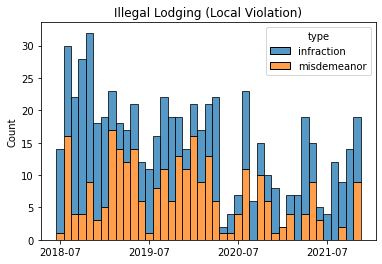

In [354]:
g  = sns.histplot(data=lodge, x='year-month', hue='type', multiple='stack')#, stat='density', multiple='dodge', common_norm=False);
ticks = g.get_xticks()
#labels = g.get_xticklabels()
ticks=[0,12,24,36]
g.set_xticks(ticks)
g.set_xlabel('');
g.set_title('Illegal Lodging (Local Violation)');

In [355]:

( lodge.groupby('type')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         lodge.groupby(['type','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     ) 
)

<ipython-input-355-a85daa46fa33>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( lodge.groupby('type')['stop_id']


,total,"(percent, arrested)","(percent, citation)","(percent, warning)"
type,,,,
infraction,358,8,71,19
misdemeanor,266,42,35,22


In [356]:
res = ( lodge.groupby(['race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
      )
res = res / res.sum() * 100
res.astype(int)

,percent
race,
Asian,1
Black/African American,23
Hispanic/Latino/a,20
Middle Eastern or South Asian,0
Native American,0
Pacific Islander,0
White,52


In [357]:
( lodge.groupby('action')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         lodge.groupby(['action','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
)
 

<ipython-input-357-6226871937da>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( lodge.groupby('action')['stop_id']


,total,"(percent, Asian)","(percent, Black/African American)","(percent, Hispanic/Latino/a)","(percent, Middle Eastern or South Asian)","(percent, Native American)","(percent, Pacific Islander)","(percent, White)"
action,,,,,,,,
arrested,143,0,28,17,0,0,2,51
citation,351,1,24,21,1,0,0,49
warning,130,1,16,20,0,0,0,61


In [358]:
( lodge.groupby('race')['stop_id']
     .count()
     .rename('total for all actions')
     .to_frame()
#     .apply(lambda x: (100*x/x.sum()).astype(int) )
     .join(
         lodge.groupby(['race','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
).drop( ['Asian','Middle Eastern or South Asian','Native American','Pacific Islander'])

<ipython-input-358-8f9a08430193>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( lodge.groupby('race')['stop_id']


,total for all actions,"(percent, arrested)","(percent, citation)","(percent, warning)"
race,,,,
Black/African American,148,27,57,14
Hispanic/Latino/a,128,19,60,20
White,328,22,53,24


In [331]:
those = result_df.query('code in [65002,65000]')

keywords = '54.0110|encroach|incroach|encroch|incroch'

these = those['reason_for_stop_explanation'].str.lower().str.contains(keywords)

print('Specifically labelled encroachment OR 54.0110 for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          those.loc[these,'stop_id'].unique().shape[0], 
          those.loc[these].shape[0] ) 
     )


encroach = those.loc[these]
encroach.date_stop = pd.to_datetime( encroach.date_stop )
encroach['year'] = encroach.date_stop.dt.year.astype(str)
encroach['year-month']=encroach.date_stop.dt.strftime("%Y-%m")
encroach['type'] = encroach.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')
trans = {'Citation for infraction':'citation', 'In-field cite and release':'citation', 'Custodial Arrest without warrant':'arrested', 'Warning (verbal or written)':'warning'}
encroach['action']=encroach['result'].apply( lambda x: trans[x])



Specifically labelled encroachment OR 54.0110 for both infraction and misdemeanor:
 3522 stops covering 4932 persons


<ipython-input-331-7e8ffa2f2ce9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach.date_stop = pd.to_datetime( encroach.date_stop )
<ipython-input-331-7e8ffa2f2ce9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach['year'] = encroach.date_stop.dt.year.astype(str)
<ipython-input-331-7e8ffa2f2ce9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

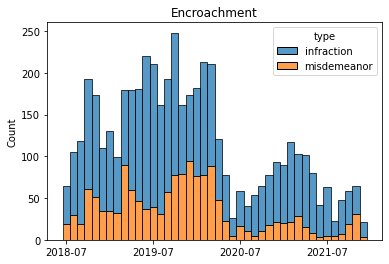

In [333]:

g  = sns.histplot(data=encroach, x='year-month', hue='type', multiple='stack')#, stat='density', multiple='dodge', common_norm=False);
ticks = g.get_xticks()
#labels = g.get_xticklabels()
ticks=[0,12,24,36]
g.set_xticks(ticks)
g.set_xlabel('');
g.set_title('Encroachment');

In [334]:

( encroach.groupby('type')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         encroach.groupby(['type','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     ) 
)

<ipython-input-334-40911ce0d1cd>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('type')['stop_id']


,total,"(percent, arrested)","(percent, citation)","(percent, warning)"
type,,,,
infraction,3481,3,65,31
misdemeanor,1451,38,38,23


In [342]:
res = ( encroach.groupby(['race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
      )
res = res / res.sum() * 100
res.astype(int)

,percent
race,
Asian,1
Black/African American,26
Hispanic/Latino/a,16
Middle Eastern or South Asian,0
Native American,0
Pacific Islander,0
White,53


Encroachments are less Hispanic and more Black and White than expected from city census of races

In [335]:
( encroach.groupby('action')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         encroach.groupby(['action','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
)
 

<ipython-input-335-9d386516ae7d>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('action')['stop_id']


,total,"(percent, Asian)","(percent, Black/African American)","(percent, Hispanic/Latino/a)","(percent, Middle Eastern or South Asian)","(percent, Native American)","(percent, Pacific Islander)","(percent, White)"
action,,,,,,,,
arrested,674,1,28,19,0,0,1,49
citation,2825,1,26,17,0,0,0,52
warning,1433,1,26,14,0,0,0,56


The table above shows evidence that, given you are getting a warning and not some other action, you are more likely to be White and less likely to be Latino.  Blacks hold steady at roughly the same percentage no matter what the action.

In [337]:
( encroach.groupby('race')['stop_id']
     .count()
     .rename('total for all actions')
     .to_frame()
#     .apply(lambda x: (100*x/x.sum()).astype(int) )
     .join(
         encroach.groupby(['race','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
).drop( ['Asian','Middle Eastern or South Asian','Native American','Pacific Islander'])
# drop races with <100 citations

<ipython-input-337-70e555fb3e36>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('race')['stop_id']


,total for all actions,"(percent, arrested)","(percent, citation)","(percent, warning)"
race,,,,
Black/African American,1317,14,57,28
Hispanic/Latino/a,827,15,59,24
White,2640,12,56,30


The table above shows evidence that, given you are a White person stopped for encroachment, as compared to POC you are more likely to get a warning and less likely to get a citation or arrested. Basically in these cases its better to be White than Black and Hispanic is worst.

In [ ]:
habitation, encampment, camping, encroachment, sleeping, tent, sitting on sidewalk, blocking sidewalk, lying, panhand*, bags, property 

In [161]:
# are people actually getting tickets for this? or just warnings?  
# I note that some explanations seem to say warning.  we need to look at result!!!

In [153]:
lodging = ( result_df.query('code == 32111').groupby('race')['stop_id'].count() 
    / result_df.query('code == 32111')['stop_id'].count() 
    * 100 ).rename('percent of illegal lodging').to_frame()
trespass = ( result_df.query('code == 32022').groupby('race')['stop_id'].count() 
    / result_df.query('code == 32022')['stop_id'].count() 
    * 100 ).rename('percent of trespass').to_frame()
allstops =  ( result_df.drop_duplicates(subset=['pid','stop_id']).groupby('race')['stop_id'].count() 
    / result_df.drop_duplicates(subset=['pid','stop_id'])['stop_id'].count() 
    * 100 ).rename('percent of all stops').to_frame()
local = ( those.loc[these].groupby('race')['stop_id'].count() 
    / these.sum()
    * 100 ).rename('percent of local encroachment etc').to_frame()
speeding = ( result_df.query('code == 54106').groupby('race')['stop_id'].count() 
    / result_df.query('code == 54106')['stop_id'].count() 
    * 100 ).rename('percent of speeding').to_frame()

In [154]:
allstops.join(speeding).join(trespass).join(lodging).join(local)

,percent of all stops,percent of speeding,percent of trespass,percent of illegal lodging,percent of local encroachment etc
race,,,,,
Asian,4.934821,11.773006,2.573222,1.949765,1.894714
Black/African American,19.948804,10.042945,25.836820,24.211492,24.222198
Hispanic/Latino/a,29.663998,30.355828,21.600418,18.236036,16.029713
Middle Eastern or South Asian,2.780254,6.423313,1.276151,0.470237,0.624394
Native American,0.222255,0.134969,0.460251,0.481707,0.409086
Pacific Islander,0.830542,1.294479,0.564854,0.630806,0.570567
White,41.619325,39.975460,47.688285,54.019956,56.249327


In [5]:
#group the stop data by race + calculate proportions + graph
#to visualize the racial breakdown of the stop data overall

In [453]:
keywords =  'habitation|habitating|inhabit|habitaion|'
keywords = keywords + '647e|647\(e\)|647 e|647 \(e\)|lodging|lodged|'
keywords = keywords + '54.0110|encroach|incroach|encroch|incroch'
keywords = keywords + 'camping|encampment|transient'

these = result_df['reason_for_stop_explanation'].str.lower().str.contains(keywords).fillna(False)

print('Specifically labelled habitation, lodging, encroachment across everything:\n',
      '{} stops covering {} persons and {} charges'.format( 
          result_df.loc[these,'stop_id'].unique().shape[0], 
          result_df.loc[these,['stop_id','pid']].drop_duplicates().shape[0],
          these.sum()
      ) 
     )

combo = result_df.loc[these]
combo.date_stop = pd.to_datetime( combo.date_stop )
combo['year'] = combo.date_stop.dt.year.astype(str)
combo['year-month']=combo.date_stop.dt.strftime("%Y-%m")
combo['type'] = combo.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')
trans = {'Citation for infraction':'citation', 'In-field cite and release':'citation', 'Custodial Arrest without warrant':'arrested', 'Warning (verbal or written)':'warning', 'Field interview card completed':'warning', 'No Action':'warning', 'Custodial Arrest pursuant to outstanding warrant':'arrested(warrant)', 'Psychiatric hold':'arrested', 'Noncriminal transport or caretaking transport':'transported', 'Contacted U.S. Department of Homeland Security':'arrested', 'Contacted parent/legal guardian or other person responsible for the minor':'parents contacted'}
combo['action']=combo['result'].apply( lambda x: trans[x])

Specifically labelled habitation, lodging, encroachment across everything:
 21741 stops covering 31083 persons and 39372 charges


<ipython-input-453-6089a9a3bfdc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo.date_stop = pd.to_datetime( combo.date_stop )
<ipython-input-453-6089a9a3bfdc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo['year'] = combo.date_stop.dt.year.astype(str)
<ipython-input-453-6089a9a3bfdc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [454]:
temp = combo['resulttext'].str.split().apply( lambda x: x[-2][-2] if type(x)==list else 'X')
trans = {'M':'misdemeanor', 'X':'no action', 'I':'infraction', 'F':'felony'}
combo['type'] = temp.apply( lambda x: trans[x])

# do we care about no action? probably not.  
# BUT we should seperately analyze no action things... stops w/o action are potential harrasment/policing predjudice
combo = combo.query('type != "no action"')

<ipython-input-454-d1526c406292>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo['type'] = temp.apply( lambda x: trans[x])


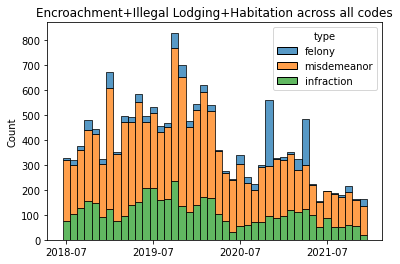

In [455]:

g  = sns.histplot(data=combo, hue='type', hue_order=['felony','misdemeanor','infraction'], x='year-month', multiple='stack')#, stat='density', multiple='dodge', common_norm=False);
ticks = g.get_xticks()
#labels = g.get_xticklabels()
ticks=[0,12,24,36]
g.set_xticks(ticks)
g.set_xlabel('');
g.set_title('Encroachment+Illegal Lodging+Habitation across all codes');

In [456]:

( combo.groupby('type')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         combo.groupby(['type','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     ) 
)

<ipython-input-456-419b392d1fcc>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( combo.groupby('type')['stop_id']


,total,"(percent, arrested)","(percent, citation)","(percent, warning)"
type,,,,
felony,1275,90,8,1
infraction,4575,3,63,32
misdemeanor,10529,36,28,34


In [457]:
res = ( combo.groupby(['race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
      )
res = res / res.sum() * 100
res.astype(int)

,percent
race,
Asian,2
Black/African American,25
Hispanic/Latino/a,19
Middle Eastern or South Asian,0
Native American,0
Pacific Islander,1
White,51


In [458]:
( combo.groupby('action')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         combo.groupby(['action','race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .fillna(0)
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     )
)

<ipython-input-458-be6fdefe6866>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( combo.groupby('action')['stop_id']


,total,"(percent, Asian)","(percent, Black/African American)","(percent, Hispanic/Latino/a)","(percent, Middle Eastern or South Asian)","(percent, Native American)","(percent, Pacific Islander)","(percent, White)"
action,,,,,,,,
arrested,5187,1,25,22,0,0,2,48
citation,6016,2,26,19,0,0,0,48
warning,5176,2,22,17,0,0,0,56


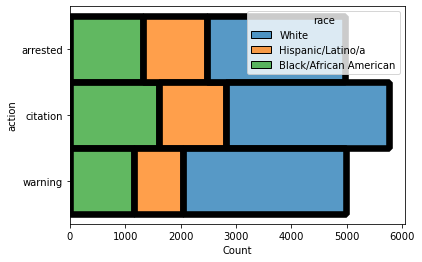

In [472]:
subc = combo.query('race in ["Black/African American","Hispanic/Latino/a","White"]').sort_values(by='action')
sns.histplot(data=subc, y='action',  hue='race', multiple='stack' );
sns.histplot?

In [443]:
# whats the racial composition of the point in time? Other surveys of SD homeless?
# How does this racial composition compare? 